# Atividade 2 - Operações sobre conjuntos Fuzzy

Programar (em qualquer linguagem) os operadores estudados, aplicá-los sobre os conjuntos fuzzy triangulares abaixo e mostrar o conjunto fuzzy resultante.

---
## Operações em Conjuntos Fuzzy
  * **Operações padrão**
     * _Complemento Fuzzy_
     * _Intersecção Fuzzy_
     * _União Fuzzy_
  * **Operações Generalizadas**
     * _T-Normas e intersecção generalizada_
     * _T-conormas e União generalizada_
     * _Dualidade e leis de De Morgan_
---

In [1]:
# LIBS
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:

def get_pertinence_triangle(a,m,b,x, max_degree=None):
    
    if x <= a or x >= b:
        return 0
    
    if x == m and max_degree != None:
        return max_degree
    
    if x > a and x <= m:
        return ((x-a)/(m-a))
    
    if x > m and x < b:
        return ((b-x)/(b-m))

def get_m(conj):
    return float((conj[0] + conj[len(conj)-1])/2)


def insert_m(conj, m):
    if m not in conj:
        conj.append(m)
        conj.sort()
    return conj


A = list(range(1, 6+1))
B = list(range(3, 7+1))


cfA = {}
cfB = {}

m_A = get_m(A)
m_B = get_m(B)

A = insert_m(A, m_A)
B = insert_m(B, m_B)

for i in A: # obtendo a pertinência de cada ponto do conjjunto A
    cfA[i] = get_pertinence_triangle(A[0], m_A, A[len(A)-1], i)
    
for i in B: # obtendo a pertinência de cada ponto do conjjunto A
    cfB[i] = get_pertinence_triangle(B[0], m_B, B[len(B)-1], i)


print('Crips ..... A {', A,'}')
print('Conjunto .. B {', B,'}')
    
print(' Fuzzy : elementos e pertinência ', cfA, len(cfA))
print(' Fuzzy : elementos e pertinência ', cfB, len(cfB))

Crips ..... A { [1, 2, 3, 3.5, 4, 5, 6] }
Conjunto .. B { [3, 4, 5, 6, 7] }
 Fuzzy : elementos e pertinência  {1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 0.8, 5: 0.4, 6: 0} 7
 Fuzzy : elementos e pertinência  {3: 0, 4: 0.5, 5: 1.0, 6: 0.5, 7: 0} 5


In [3]:
# função para plotagem dos conjuntos

def plotar_conjunto(cojuntos, labels, title=None):
    
    color = ['--bo','--go', '--ro', '--yo', '--po']
    
    fig, ax = plt.subplots()

    for i in range(len(cojuntos)):
       plt.plot(cojuntos[i][0], cojuntos[i][1], color[i], label=labels[i])


    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('#00FFCC')
    plt.title(title)
    plt.grid(True)

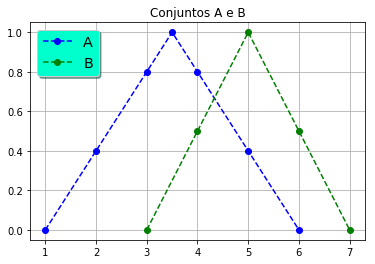

In [4]:
# cojunto dos cojuntos
conj = [[cfA.keys(), cfA.values()],
        [cfB.keys(), cfB.values()]]

# plot sets
plotar_conjunto(conj, ['A','B'], 'Conjuntos A e B')


## Operações padrão
---
### Intersecção
  * $(A ∩ B) (x) = min(A(x), B(x))$

In [5]:
#intersection = fuzz.fuzzymath.fuzzy_or(x,mfx,y,mfy) - função fuzzy

# mínimo ponto da intersecção dos conjuntos eu encontro 
# o maior grau de pertinência.

# encontrar o maior ponto de intersecção de A e B e definir o meu M

# função de uniao com operador máximo
def intersection_fuzzy(cfA,cfB):
    chaves = list(set(cfA) & set(cfB))
    inter = {}
    for i in chaves:
        value = min(cfA[i], cfB[i])
        inter[i] = value
    return inter

AIB = intersection_fuzzy(cfA, cfB)

AIB  

{3: 0, 4: 0.5, 5: 0.4, 6: 0}

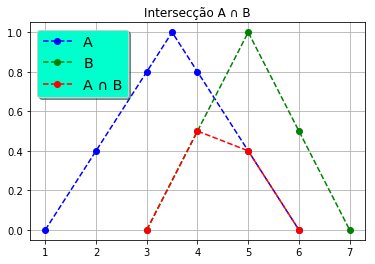

In [30]:
# se estiver somente o conjunto A e B eu adiciono o conjunto de intersecção para plotagem
if len(conj) == 2:
    conj.append([AIB.keys(), AIB.values()])

plotar_conjunto(conj, ['A','B', 'A ∩ B'], 'Intersecção A ∩ B')

###  União
  * $(A U B) (x) = max(A(x), B(x))$

In [6]:
# função de uniao com operador mínimo

def union_fuzzy(cfA,cfB):
    chaves = list(set(cfA).union(cfB))
    print(chaves)
    inter = {}
    for i in chaves:
        if i in cfA and i in cfB: # se tiverem a mesma chave
            value = max(cfA[i], cfB[i])
            inter[i] = value
        else:
            if i in cfA:
                inter[i] = cfA[i]
            else:
                inter[i] = cfB[i]
        
    return inter

AUB = union_fuzzy(cfA, cfB)
AUB

[1, 2, 3, 3.5, 4, 5, 6, 7]


{1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 0.8, 5: 1.0, 6: 0.5, 7: 0}

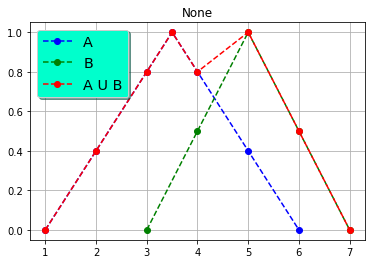

In [32]:

# na posição da interseção eu ponho o conjunto da uniao
if len(conj) == 3:
    conj[2] = [AUB.keys(), AUB.values()] 

plotar_conjunto(conj,['A','B','A U B'])

###  Complemento
  * $A’(x) = 1 – A$

In [34]:
def complemento_fuzzy(conj):
    cj = {}
    for key in conj:
        cj[key] = 1-conj[key]
    return cj

{1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 0.8, 5: 0.4, 6: 0}
{1: 1, 2: 0.6, 3: 0.19999999999999996, 3.5: 0.0, 4: 0.19999999999999996, 5: 0.6, 6: 1}


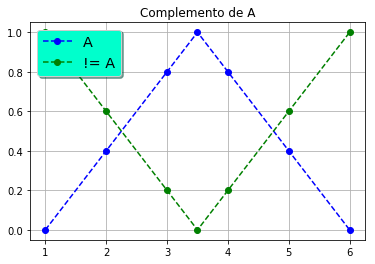

In [36]:
# complemento de A
c_cfA = complemento_fuzzy(cfA)
print(cfA)
print(c_cfA)

# removo ultima opção, que geralmente é a união
if len(conj) == 3:
    conj.pop()
    
# adiciono o complemento de A
conj[1] = [c_cfA.keys(), c_cfA.values()] 

# ploto o conjunto A e o seu complemento
plotar_conjunto(conj,['A','!= A'], "Complemento de A")

{1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 0.8, 5: 0.4, 6: 0}
{3: 1, 4: 0.5, 5: 0.0, 6: 0.5, 7: 1}


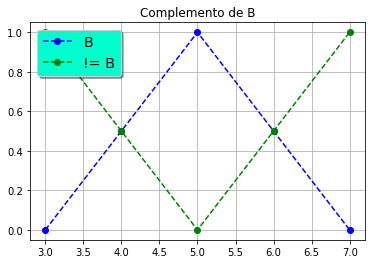

In [37]:
# complemento de B
c_cfB = complemento_fuzzy(cfB)
print(cfA)
print(c_cfB)

conj[0] = [cfB.keys(), cfB.values()]
conj[1] = [c_cfB.keys(), c_cfB.values()]

plotar_conjunto(conj,['B','!= B'], "Complemento de B")

## Operações Generalizadas
---
### T-Normas e intersecção generalizada
  * **Produto Algébrico**
     * $x t2 y = xy$

In [44]:
def intersection_fuzzy_produto_algebrico(cfA,cfB):
    chaves = list(set(cfA) & set(cfB))
    inter = {}
    for i in chaves:
        value = (cfA[i] * cfB[i])
        inter[i] = value
    return inter

pa_AB = intersection_fuzzy_produto_algebrico(cfA, cfB)

pa_AB

{3: 0.0, 4: 0.4, 5: 0.4, 6: 0.0}

In [47]:
# cojunto dos cojuntos
conj = [[cfA.keys(), cfA.values()],
        [cfB.keys(), cfB.values()]]

conj.append([pa_AB.keys(), pa_AB.values()])

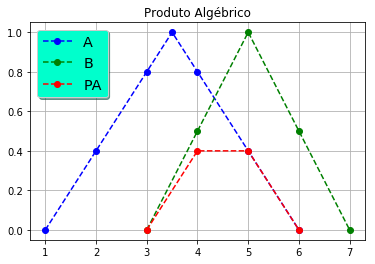

In [48]:
plotar_conjunto(conj,['A','B', 'PA'], "Produto Algébrico")

  * **Diferença Limitada - Conjunção de Lukasiewicz**
     * $x t3 y = max(0, x + y –1)$

In [50]:
def intersection_fuzzy_diferenca_limitada(cfA,cfB):
    chaves = list(set(cfA) & set(cfB))
    inter = {}
    for i in chaves:
        value = max(0, ((cfA[i] + cfB[i])-1))
        inter[i] = value
    return inter

dl_AB = intersection_fuzzy_diferenca_limitada(cfA, cfB)

dl_AB

{3: 0, 4: 0.30000000000000004, 5: 0.3999999999999999, 6: 0}

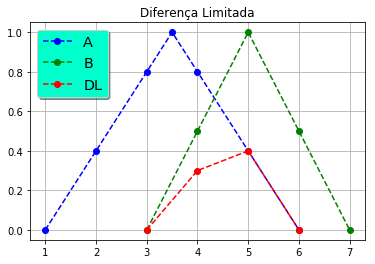

In [51]:
conj[2] = [dl_AB.keys(),dl_AB.values()]
plotar_conjunto(conj,['A','B', 'DL'], "Diferença Limitada")

  * **Intersecção (produto) - Conjunção Drástica**
    * $y\; se\; x = 1$
    * $x\; se\; y = 1$
    * $0$ caso contrário.

In [54]:
def intersection_fuzzy_drastica(cfA,cfB):
    chaves = list(set(cfA) & set(cfB))
    inter = {}
    for i in chaves:
        value = 0
        if cfA[i] == 1:
            value = cfB[i]
        elif cfB[i] == 1:
            value = cfA[i]
        else:
            value = 0
        inter[i] = value
    return inter

ID_AB = intersection_fuzzy_drastica(cfA, cfB)

ID_AB

{3: 0, 4: 0, 5: 0.4, 6: 0}

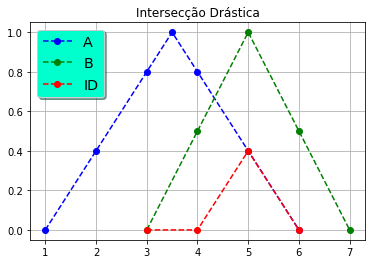

In [55]:
conj[2] = [ID_AB.keys(),ID_AB.values()]
plotar_conjunto(conj,['A','B', 'ID'], "Intersecção Drástica")

## Operações Generalizadas
---
### Co-normas triangulares (s-normas): união
  * **Soma algébrica (probabilística):**
     * $x\; s2\; y = x + y – xy$

In [63]:
# função de uniao com operador mínimo

def soma_algebrica(x, y):
    return x + y - (x*y)

def union_fuzzy_soma_algebrica(cfA,cfB):
    chaves = list(set(cfA).union(cfB))
    print(chaves)
    inter = {}
    for i in chaves:
        if i in cfA and i in cfB: # se tiverem a mesma chave
            value = soma_algebrica(cfA[i], cfB[i])
            inter[i] = value
        else:
            if i in cfA:
                inter[i] = cfA[i]
            else:
                inter[i] = cfB[i]
        
    return inter

sa_AB = union_fuzzy_soma_algebrica(cfA, cfB)
sa_AB

[1, 2, 3, 3.5, 4, 5, 6, 7]


{1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 0.9, 5: 0.9999999999999999, 6: 0.5, 7: 0}

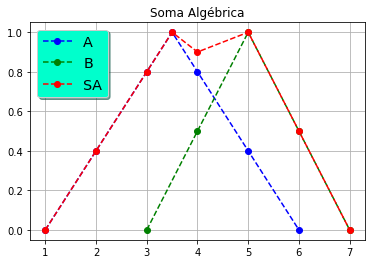

In [64]:
# na posição da interseção eu ponho o conjunto da uniao
if len(conj) == 3:
    conj[2] = [sa_AB.keys(), sa_AB.values()] 

plotar_conjunto(conj,['A','B','SA'], 'Soma Algébrica')

  * **Soma limitada (Lukasiewicz):**
     * $x\; s3\; y\; = min(1, x + y)$

In [65]:
# função de uniao com operador soma limitada
# geralmente atinge uma  maior região de uniao

def soma_limitada(x, y):
    return min(1, (x+y))

def union_fuzzy_soma_limitada(cfA,cfB):
    chaves = list(set(cfA).union(cfB))
    print(chaves)
    inter = {}
    for i in chaves:
        if i in cfA and i in cfB: # se tiverem a mesma chave
            value = soma_limitada(cfA[i], cfB[i])
            inter[i] = value
        else:
            if i in cfA:
                inter[i] = cfA[i]
            else:
                inter[i] = cfB[i]
        
    return inter

sl_AB = union_fuzzy_soma_limitada(cfA, cfB)
sl_AB

[1, 2, 3, 3.5, 4, 5, 6, 7]


{1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 1, 5: 1, 6: 0.5, 7: 0}

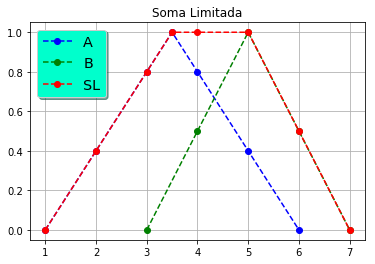

In [66]:
if len(conj) == 3:
    conj[2] = [sl_AB.keys(), sl_AB.values()] 

plotar_conjunto(conj,['A','B','SL'], 'Soma Limitada')

  * **União (soma) drástica: x s4 y = :**
    * $x\; se\; y = 0$
    * $y\; se\; x = 0$
    * $1$ caso contrário.

In [71]:
# função de uniao com operador soma drástica
# geralmente atinge uma  maior região de uniao

def soma_drastica(x, y):
    if x == 0:
        return y
    elif y == 0:
        return x
    return 1

def union_fuzzy_soma_soma_drastica(cfA,cfB):
    chaves = list(set(cfA).union(cfB))
    print(chaves)
    inter = {}
    for i in chaves:
        if i in cfA and i in cfB: # se tiverem a mesma chave
            value = soma_drastica(cfA[i], cfB[i])
            inter[i] = value
        else:
            if i in cfA:
                inter[i] = cfA[i]
            else:
                inter[i] = cfB[i]
        
    return inter

sd_AB = union_fuzzy_soma_soma_drastica(cfA, cfB)
sd_AB

[1, 2, 3, 3.5, 4, 5, 6, 7]


{1: 0, 2: 0.4, 3: 0.8, 3.5: 1.0, 4: 1, 5: 1, 6: 0.5, 7: 0}

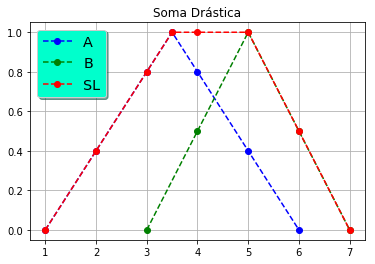

In [72]:
if len(conj) == 3:
    conj[2] = [sd_AB.keys(), sd_AB.values()] 

plotar_conjunto(conj,['A','B','SL'], 'Soma Drástica')